<a href="https://colab.research.google.com/github/anjilakarkigit/dataVisualization/blob/main/Exam_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##EXAM 1, Anjila Karki
#CPSMA 4313

##REFRENCES
1.https://github.com/nurfnick/Data_Viz/blob/main/12_GatheringConclusion.ipynb

2.https://github.com/anjilakarkigit/dataVisualization/blob/main/examReview.ipynb

3.https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

I attest that the resources above were the only ones utilized in completing
the exam and the work included is my own and no one else from the course.

I am going to need some packages in order to store the table on 800km mountains from wikipedia. After I load packages, I will be grabing the first table from wikipedia since that is the one I need.

In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup


r = requests.get('https://en.wikipedia.org/wiki/List_of_mountains_by_elevation')
html_contents = r.text
html_soup = BeautifulSoup(html_contents,"lxml")
tables = html_soup.find_all('table',class_="wikitable")

df = pd.read_html(str(tables))[0]
df

,Mountain,Metres,Feet,Range,Location and Notes
0,Mount Everest,8848,29029,Himalayas,Nepal/China
1,K2,8611,28251,Karakoram,Pakistan/China
2,Kangchenjunga,8586,28169,Himalayas,Nepal/India
3,Lhotse,8516,27940,Himalayas,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485,27838,Himalayas,Nepal
5,Cho Oyu,8188,26864,Himalayas,"Nepal – Considered ""easiest"" eight-thousander"
6,Dhaulagiri,8167,26795,Himalayas,Nepal – Presumed world's highest from 1808-1838
7,Manaslu,8163,26781,Himalayas,Nepal
8,Nanga Parbat,8126,26660,Himalayas,Pakistan
9,Annapurna,8091,26545,Himalayas,Nepal – First eight-thousander to be climbed (...


Now, I am going to use query to return mountains only in the Himalayas.

In [3]:
df.query('Range == "Himalayas"')

,Mountain,Metres,Feet,Range,Location and Notes
0,Mount Everest,8848,29029,Himalayas,Nepal/China
2,Kangchenjunga,8586,28169,Himalayas,Nepal/India
3,Lhotse,8516,27940,Himalayas,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485,27838,Himalayas,Nepal
5,Cho Oyu,8188,26864,Himalayas,"Nepal – Considered ""easiest"" eight-thousander"
6,Dhaulagiri,8167,26795,Himalayas,Nepal – Presumed world's highest from 1808-1838
7,Manaslu,8163,26781,Himalayas,Nepal
8,Nanga Parbat,8126,26660,Himalayas,Pakistan
9,Annapurna,8091,26545,Himalayas,Nepal – First eight-thousander to be climbed (...
13,Shishapangma,8027,26335,Himalayas,China


  In order to create a barchart of Ranges, I will be using groupby attribute. It will help me to grab the data under 'Range' column and using bar, I will be creating a barchart.

Range
Himalayas    AxesSubplot(0.125,0.125;0.775x0.755)
Karakoram    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

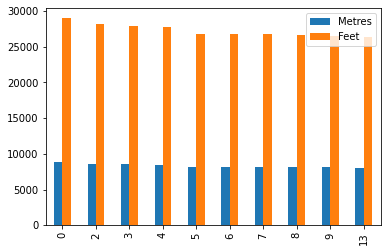

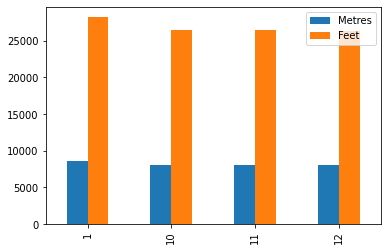

In [5]:
df.groupby('Range').plot(kind='bar')

It is interesting to see double barchart. I am not sure why did it print two barchart. I am thinking if this has to do with two integer type column, metres and feet.

For creating a boxplot, I had to do some research and this is what I found on the web and it seems to work perfect. I also found that df.groupby would be more suitable for string type dataset and df[columnname].plot would be more compatible with integer data set.

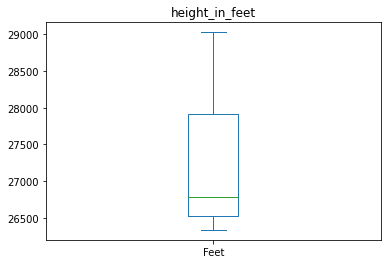

In [ ]:
df['Feet'].plot(kind='box', title='height_in_feet')

In order to find the mean, standard deviation and five number summary of the height in feet, I am going to ask dataframe to grab feet column using df.Feet and using describe(), it is going to load all the mean , median, etc realted to Feet column.

In [ ]:
df.Feet.describe()

count       14.000000
mean     27178.000000
std        879.489537
min      26335.000000
25%      26518.000000
50%      26788.000000
75%      27914.500000
max      29029.000000
Name: Feet, dtype: float64

 In order to calculate the mean and median of mountains when grouped by their Range, I am simply going to use .groupby to group according to range and I will be using .agg to find the mean and median. There are two outputs for the following code which is because of the feet and metres.

Using .Feet or .Metres at the end would yeild the single mean and median column based on feet or metres.

In [7]:
df.groupby('Range').agg(['mean','median'])

Metres             Feet         
              mean  median     mean   median
Range                                       
Himalayas  8319.70  8177.5  27295.6  26829.5
Karakoram  8194.25  8065.5  26884.0  26461.5

##BIG QUERY


Before I begin, I am going to use cloud resource manager to create a cloud platform project. After that, I am going to add billing for the project and enable BigQuery APIs for the project.

In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


Now that I am authenticated, I can start to play around in the dataset. I am going to look at dataset from 'chicago_taxi_trips.taxi_trips' .

In [ ]:
%%bigquery --project data-visualization-class-sql
SELECT *
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
LIMIT 5

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,b8e0c2e280a66fd9ae089df2f4759d6a3b0be246,b2f6b3dd391f77e0791cae7943dae465cf9859b13c86e9...,2014-12-11 17:00:00+00:00,2014-12-11 17:00:00+00:00,0,0.0,None,None,None,None,7.85,1.00,0.0,0.0,8.85,Credit Card,Suburban Dispatch LLC,None,None,None,None,None,None
1,3e0ba7c63441a7277c4475c05fac1826d5825081,b1de4d4ce24ec1a8e9d0cd77d9aa3f7b340b8297297efd...,2015-02-05 20:30:00+00:00,2015-02-05 20:30:00+00:00,0,0.0,None,None,None,None,6.45,0.00,0.0,0.0,6.45,Credit Card,T.A.S. - Payment Only,None,None,None,None,None,None
2,b27a2815af3491b6004573250c890b55c0e64e77,ae0fb599586f950b7811c99713a56c03504a54c30c6cde...,2015-02-05 18:45:00+00:00,2015-02-05 18:45:00+00:00,0,0.0,None,None,None,None,13.65,2.73,0.0,0.0,16.38,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,None,None,None,None,None,None
3,0cd7097adfa219daef29c655cc0c76bdbd2028df,07009b8e9b32f36656567f7809b970af38e59dbb58704a...,2015-02-07 03:45:00+00:00,2015-02-07 03:45:00+00:00,0,0.0,None,None,None,None,14.35,0.00,0.0,0.0,14.35,Credit Card,Suburban Dispatch LLC,None,None,None,None,None,None
4,26ee1435374aaefd2d8b21e2048780f315ddeece,b884dd3799982951b7b1293d92a3e6e90ba3483a6fdbf2...,2015-02-03 09:45:00+00:00,2015-02-03 09:45:00+00:00,0,0.0,None,None,None,None,8.25,2.06,0.0,0.0,10.31,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,None,None,None,None,None,None


I am going to use COUNT(*) in order to find the total rows in the dataset.

In [ ]:
%%bigquery --project data-visualization-class-sql
SELECT 
      COUNT (*) as total_rows
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`


,total_rows
0,198792903


Finding the average trip total based on payment type using GROUPBY and AVG .

In [ ]:
%%bigquery --project data-visualization-class-sql
SELECT  payment_type, AVG(trip_total) as average_trip
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
GROUP BY payment_type

,payment_type,average_trip
0,Unknown,17.649893
1,Mobile,20.339910
2,No Charge,15.836177
3,Way2ride,16.639366
4,Split,18.788039
5,Credit Card,20.524892
6,Prcard,20.320682
7,Cash,12.265548
8,Prepaid,22.377662
9,Dispute,15.496588


Now because I need to find the total trips that had a non-zero recorded time, were above the average time, I am going to find the average time first by itself.

In [ ]:
%%bigquery --project data-visualization-class-sql
SELECT AVG(trip_seconds)
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`



,f0_
0,792.717188


Here I am going to use avergae time from above calculation to find the total trips that had a non-zero recorded time, were above the average time. The reason for doing that was due to constraints of WHERE clause as it won't allow to use aggregate functions like AVG with it. 

In [ ]:
%%bigquery --project data-visualization-class-sql
SELECT COUNT(*) as total_number_of_trips
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE trip_seconds != 0 AND trip_seconds>792.717188

,total_number_of_trips
0,62143014


I worked on the exam for one hour and 15 minutes. 
The hardest part was to get the average time trip constraint of 2. c) in same line of code without having to calculate avegrage time taken for trips separately. Since I find Sql, more challangeing than pandas, I am more excited to use SQL again in the future and hopefully learn more about it. 